# Spectral Analysis

In [1]:
# load all libraries
import numpy as np
import matplotlib.pyplot as plt

## Time vs phase-locked

Let's first have a function that generates sine waves for us with specified parameters.

In [2]:
# 1s, 1000 Hz
t = np.linspace(0, 1, 1000)

# generate a sine wave ... default 1 Hz
def make_sine(f = 1, t = np.linspace(0, 1, 1000), p = 0):
    sine_wave = np.sin(2 * np.pi * f * t + p)
    return sine_wave

Now a function that takes the sign and embeds it into a longer trial

In [10]:
def make_trial(totdur = 3, startosc = 1, freqosci = 1, oscidur = 1, phase = 0):
    ttot = np.linspace(0, totdur, 1000 * totdur) #3 sec epoch
    tosci = np.linspace(0, oscidur, 1000 * oscidur)
    sine_wave = make_sine(f = freqosci, t= tosci, p = phase)
    trial = np.zeros(len(ttot))
    # find beginning of event
    ind1 = np.argmin(np.abs(ttot-startosc))
    ind2 = ind1 + len(tosci)
    
    assert ind2 <= len(ttot), 'The embedded response cannot be longer than the trial'

    trial[ind1:ind2] = trial[ind1:ind2] + sine_wave
    return  ttot, trial
    

Following responses are time-locked

Text(0.5, 0, 'Time (s)')

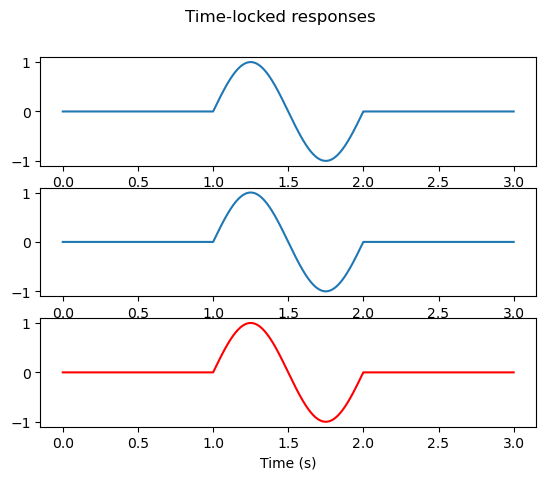

In [18]:
time, trial1 = make_trial()
time, trial2 = make_trial()

fig, axs = plt.subplots(3)
fig.suptitle('Time-locked responses')
axs[0].plot(time, trial1)
axs[1].plot(time, trial2)
axs[2].plot(time, (trial1 + trial2)/2, 'red')
plt.xlabel('Time (s)')


Response that is not time locked.

Text(0.5, 0, 'Time (s)')

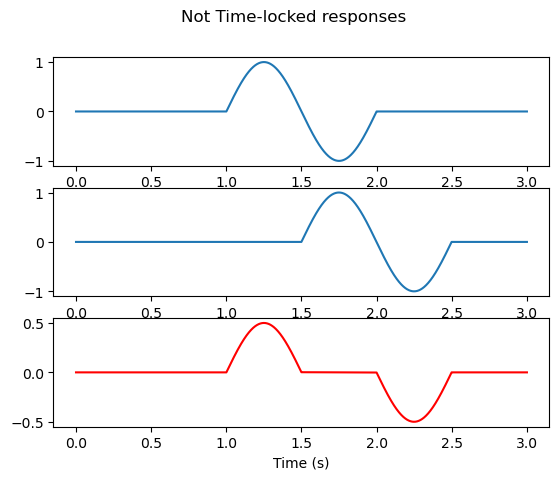

In [19]:
time, trial1 = make_trial()
time, trial2 = make_trial(startosc = 1.5)

fig, axs = plt.subplots(3)
fig.suptitle('Not Time-locked responses')
axs[0].plot(time, trial1)
axs[1].plot(time, trial2)
axs[2].plot(time, (trial1 + trial2)/2, 'red')
plt.xlabel('Time (s)')

Responses that are time, but not phase locked

Text(0.5, 0, 'Time (s)')

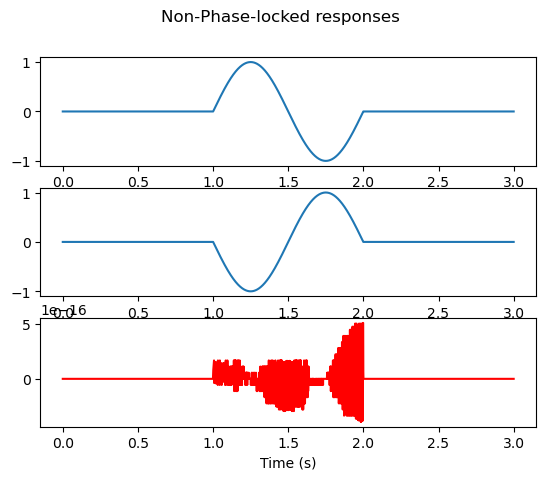

In [20]:
time, trial1 = make_trial()
time, trial2 = make_trial(phase = np.pi)

fig, axs = plt.subplots(3)
fig.suptitle('Non-Phase-locked responses')
axs[0].plot(time, trial1)
axs[1].plot(time, trial2)
axs[2].plot(time, (trial1 + trial2)/2, 'red')
plt.xlabel('Time (s)')

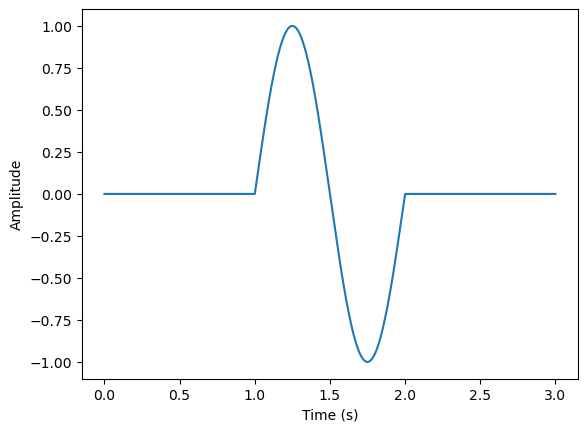

In [28]:

plt.plot(time, trial)


Let's create a 1 Hz wave and plot it.

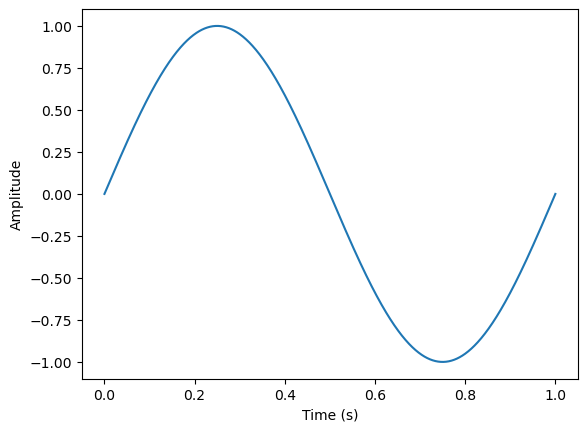

In [45]:
sine_1Hz = make_sine(1,t)

# plot the sine wave
plt.plot(t, sine_1Hz)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()